In [ ]:
! pip install pandas numpy matplotlib seaborn catboost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
import sqlite3

In [2]:
df_fields = pd.read_csv('fields.csv', delimiter=';')
df_values = pd.read_csv('value.csv', delimiter=';')
df_works = pd.read_csv('works.csv', delimiter=';')

df_fields.columns = df_fields.iloc[0]

df_fields = df_fields.drop(0).reset_index(drop=True)

df_works.drop(0, axis=0, inplace=True)

df_values.drop(0, axis=0, inplace=True)

/tmp/ipykernel_134879/1743888777.py:3: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_works = pd.read_csv('works.csv', delimiter=';')


In [5]:
def convert_data_types(df, numeric_columns):
    df = df.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df


numeric_columns_fields = [
    "Балл плодородия", "Площадь", "Урожайность плановая", 
    "Содержание фософора в почве", "Содержание калия в почве", "Гумус", "Кислотность почвы"
]

numeric_columns_works = [
    "Площадь, выполненной работы", "Вес убранной с поля продукции", 
    "Влажность зерна средневзвешенная с поля", "Сорная примесь средневзвешенная с поля", 
    "Урожайность фактическая", 'Глубина обработки(только для работ с типом "Почвообработка")',
    'Содержание сухого вещества, средневзвешенное с поля'
]

numeric_columns_values = [
    "Вес внесенного на поле ТМЦ", "Средняя доза внесения ТМЦ"
]

df_fields = convert_data_types(df_fields, numeric_columns_fields)
df_works = convert_data_types(df_works, numeric_columns_works)
df_values = convert_data_types(df_values, numeric_columns_values)

In [ ]:
# merged_df = pd.merge(df_fields, df_works, on=['Номер поля', 'Сезон'], how='left')
# merged_df = pd.merge(merged_df, df_values, on=['Номер поля'], how='left')

# connection = sqlite3.connect('fields.db')
# cursor = connection.cursor()

# merged_df.to_sql("merged", connection)
# df_values.to_sql("values", connection)
# df_works.to_sql("works", connection)
# df_fields.to_sql("fields", connection)

# connection.close()

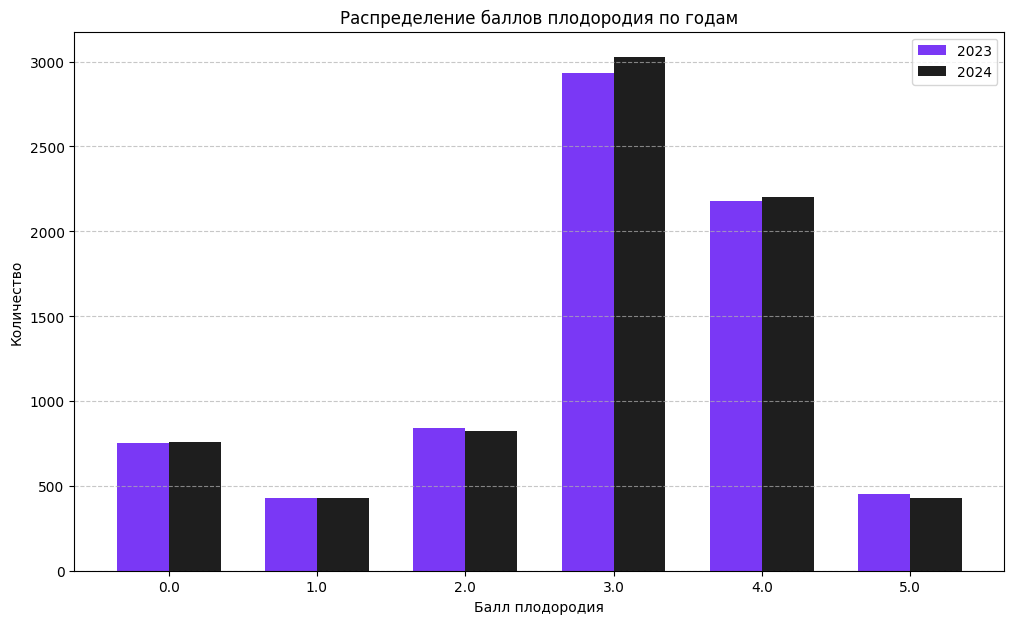

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

result = df_fields.groupby(['Сезон', 'Балл плодородия']).size().reset_index(name='count')

result = result.sort_values(by=['Сезон', 'Балл плодородия']).reset_index(drop=True)

years = result['Сезон'].unique()
fertility_scores = result['Балл плодородия'].unique()

bar_width = 0.35

r1 = np.arange(len(fertility_scores))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 7))
colors = ['#7A38F5', '#1E1E1E']  
for i, year in enumerate(years):
    subset = result[result['Сезон'] == year]
    plt.bar(r1 if year == years[0] else r2, subset['count'], width=bar_width, label=str(year), color=colors[i])

plt.xlabel('Балл плодородия')
plt.xticks([r + bar_width/2 for r in range(len(fertility_scores))], fertility_scores)
plt.ylabel('Количество')
plt.title('Распределение баллов плодородия по годам')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [16]:
len(df_fields[df_fields['Сезон'] == '2023']['Номер поля'].unique())

7909

In [18]:
len(df_fields[df_fields['Сезон'] == '2024']['Номер поля'].unique())

8145

In [15]:
df_fields.isna().sum()

0
Номер поля                            0
Регион                                0
Вид с/х угодья                        0
Балл плодородия                     801
Сезон                                 0
Текущая культура                      0
Культура предшественник             338
Год жизни многолетней культуры    13369
Площадь                               0
Сорт / гибрид                      7376
Репродукция высеваемых семян       7861
Происхождение семян                7587
Технология выращивания             7289
Урожайность плановая               5358
Содержание фософора в почве           0
Содержание калия в почве              0
Гумус                                 0
Кислотность почвы                     0
dtype: int64

In [17]:
df_works.shape, df_works.isna().sum()

((174683, 18),
 Сезон                                                            141916
 Номер поля                                                            0
 Тип работы                                                            0
 Подтип работы                                                         0
 Дата начала                                                           0
 Дата окончания                                                     9004
 Площадь, выполненной работы                                        2026
 Основная техника                                                      0
 Прицепная техника                                                 48540
 Механизатор                                                           0
 Глубина обработки (только для работ с типом "Почвообработка")    135495
 Назначение готовой продукции                                     140822
 Вес убранной с поля продукции                                         0
 Содержание сухого вещества, среднев

In [18]:
df_values.shape, df_values.isna().sum()

((170813, 8),
 Номер поля                          0
 Тип внесенного на поле ТМЦ          0
 Название внесенного на поле ТМЦ     0
 Вес внесенного на поле ТМЦ          0
 Единица измерения ТМЦ              12
 Средняя доза внесения ТМЦ           0
 Дата внесения ТМЦ на поле           0
 Номер тех операции в системе        0
 dtype: int64)

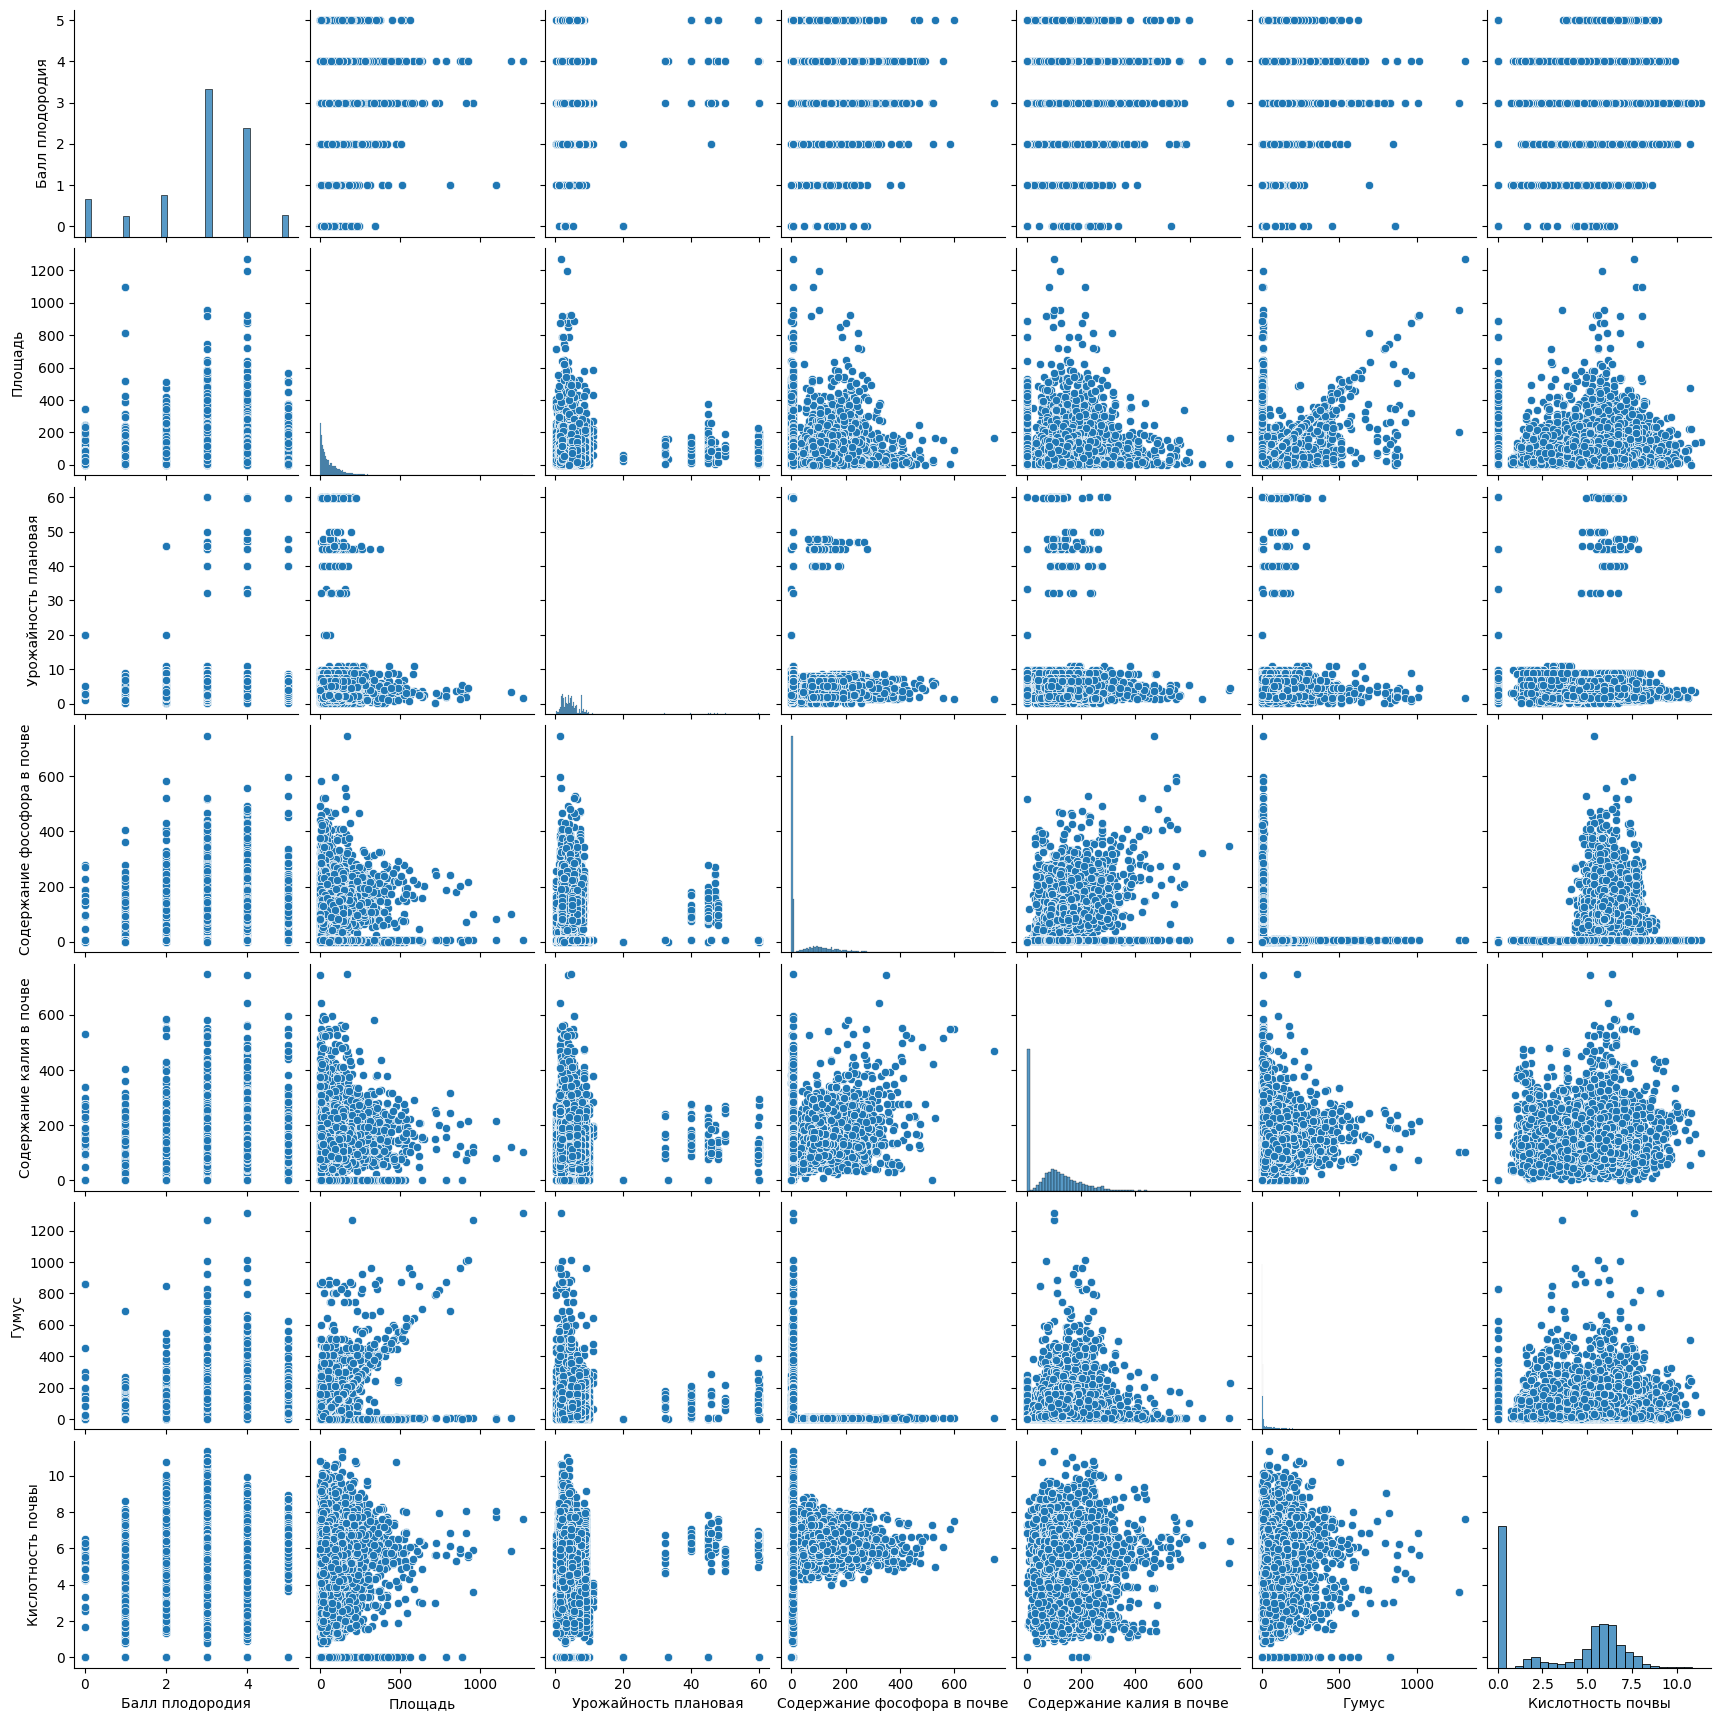

In [19]:
sns.pairplot(df_fields)

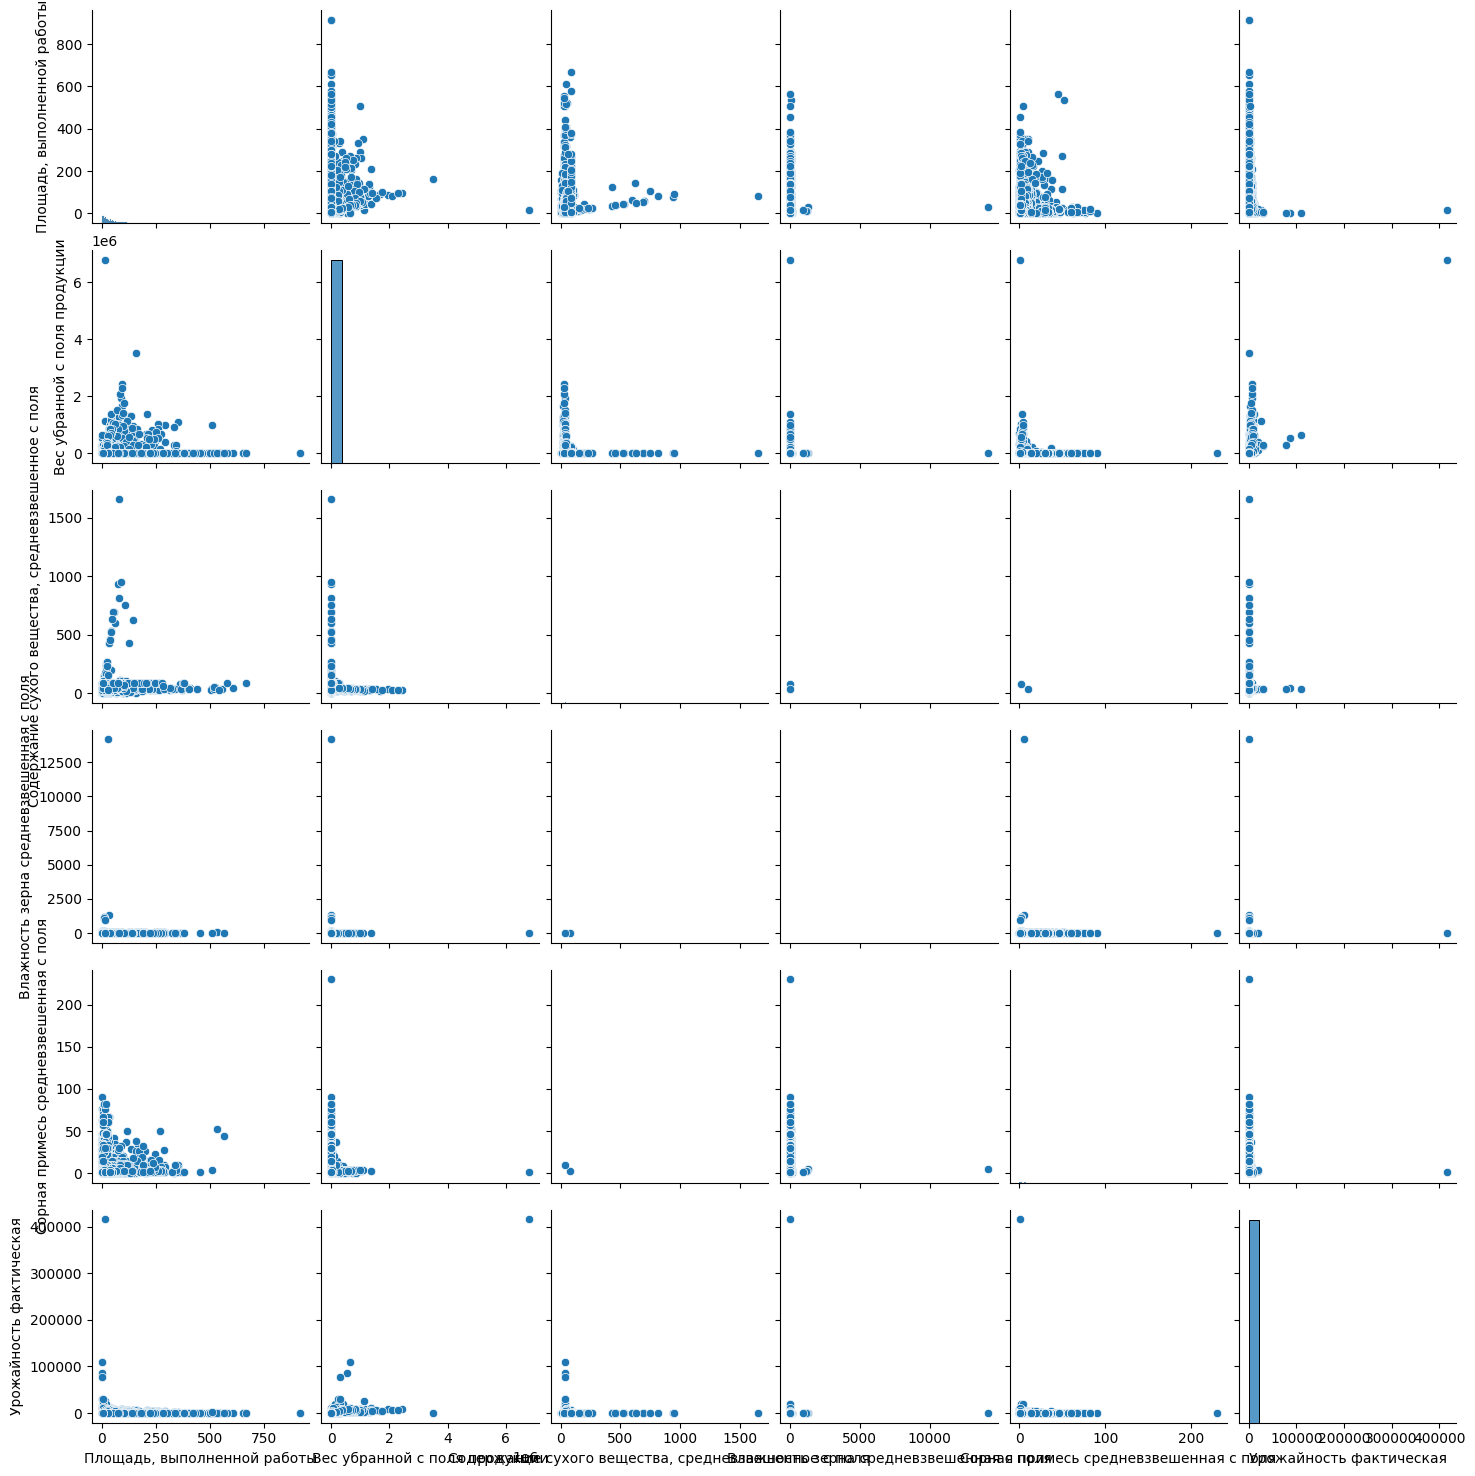

In [6]:
sns.pairplot(df_works)
plt.show()

In [6]:
df_fields['Сезон'].value_counts()

Сезон
2024    8145
2023    7909
Name: count, dtype: int64

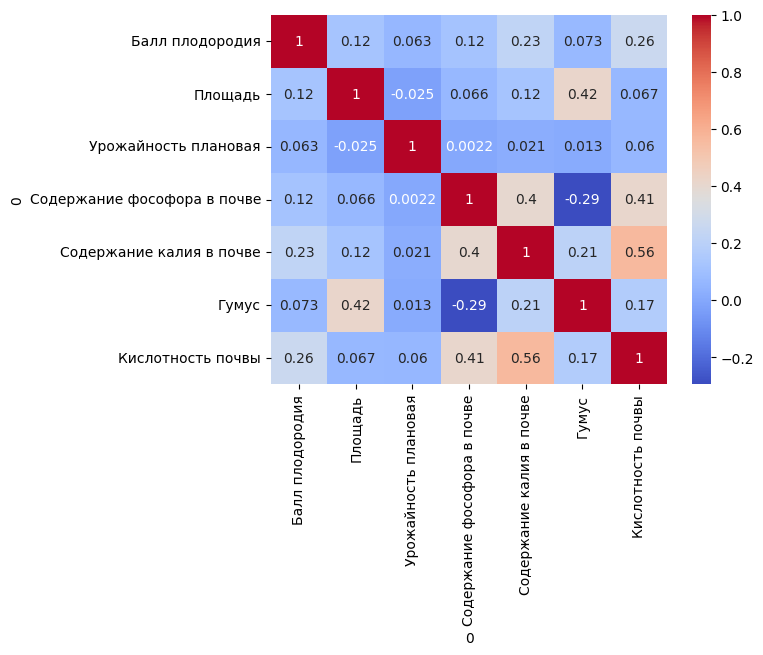

In [ ]:
numeric = df_fields.select_dtypes(include=np.number).copy()
numeric = numeric.dropna()
sns.heatmap(numeric.corr(), cmap='coolwarm', robust=True, annot=True)
plt.show()